# Model Regularization 
(Reducing Model Complexity so it doesn't store too much information)

In [3]:
# Original Model (Refer to previous chapters)
from tensorflow.keras.datasets import imdb
from keras import layers
import keras
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)

def vectorize_sequences(sequences, dimension=5000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results 
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history_original = model.fit(
    train_data, train_labels,
    epochs=20, 
    batch_size=512, 
    validation_split=0.4)



Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6905 - loss: 0.6111 - val_accuracy: 0.8516 - val_loss: 0.4209
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8700 - loss: 0.3809 - val_accuracy: 0.8768 - val_loss: 0.3321
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8991 - loss: 0.2888 - val_accuracy: 0.8810 - val_loss: 0.3030
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9170 - loss: 0.2381 - val_accuracy: 0.8865 - val_loss: 0.2853
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9260 - loss: 0.2086 - val_accuracy: 0.8864 - val_loss: 0.2828
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9325 - loss: 0.1888 - val_accuracy: 0.8794 - val_loss: 0.2970
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9417 - loss: 0.1639 - val_accuracy: 0.8819 - val_loss: 0.2981
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9457 - loss: 0.1537 - val_accuracy: 0.8798 - val_l

In [4]:
# Version of the model with lower capacity
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, 
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6719 - loss: 0.6472 - val_accuracy: 0.8361 - val_loss: 0.5314
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8571 - loss: 0.4983 - val_accuracy: 0.8554 - val_loss: 0.4425
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8773 - loss: 0.4088 - val_accuracy: 0.8703 - val_loss: 0.3846
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8938 - loss: 0.3430 - val_accuracy: 0.8738 - val_loss: 0.3440
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9027 - loss: 0.3010 - val_accuracy: 0.8802 - val_loss: 0.3175
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9106 - loss: 0.2635 - val_accuracy: 0.8816 - val_loss: 0.3011
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9183 - loss: 0.2379 - val_accuracy: 0.8850 - val_loss: 0.2903
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9228 - loss: 0.2205 - val_accuracy: 0.8852 - v

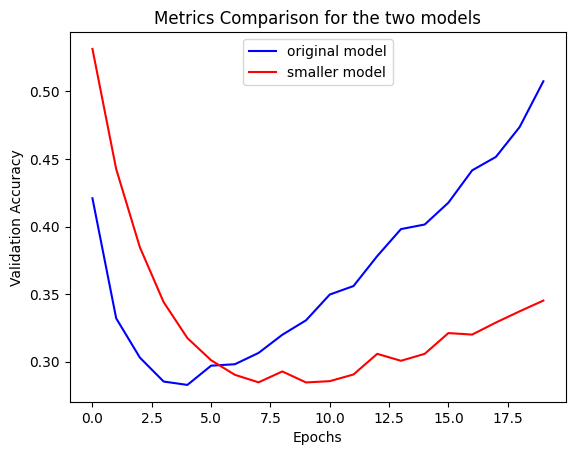

In [13]:
# plot the validation metrics for each model
import matplotlib.pyplot as plt
plt.plot(history_original.history["val_loss"], "b", label="original model")
plt.plot(history_smaller_model.history["val_loss"], "r", label="smaller model")
plt.title("Metrics Comparison for the two models")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
# Note that it's harder for the smaller model to overfit

### Weight Regularization 
-- Weights are kept small by using L1 and L2 regularizations(or Dropout Layer)<br><br>
L1: a value proportional to absolute value of the weights is added as loss<br>
L2: the cost added is proportional to the square of the value of the weight coefficients



In [14]:
# L2 regularization
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(
        16,
        kernel_regularizer=regularizers.l2(0.002),
        activation="relu"),
    layers.Dense(
        16, 
        kernel_regularizer=regularizers.l2(0.002),
        activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6094 - loss: 0.7423 - val_accuracy: 0.7902 - val_loss: 0.6014
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8409 - loss: 0.5535 - val_accuracy: 0.8655 - val_loss: 0.4699
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8848 - loss: 0.4318 - val_accuracy: 0.8735 - val_loss: 0.4105
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9005 - loss: 0.3713 - val_accuracy: 0.8709 - val_loss: 0.3976
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9106 - loss: 0.3303 - val_accuracy: 0.8817 - val_loss: 0.3681
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9186 - loss: 0.3096 - val_accuracy: 0.8577 - val_loss: 0.4121
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9180 - loss: 0.3000 - val_accuracy: 0.8767 - val_loss: 0.3741
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9288 - loss: 0.2826 - val_accuracy: 0.8695 - v

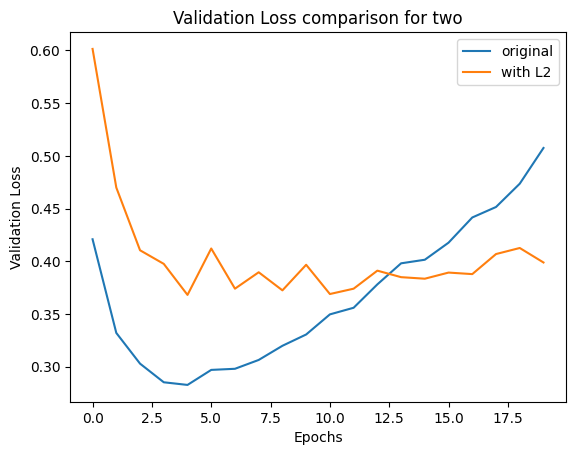

In [24]:
# Let's compare the first model and model with L2
plt.title("Validation Loss comparison for two")
plt.plot(history_original.history["val_loss"], label="original")
plt.plot(history_l2_reg.history["val_loss"], label="with L2")
plt.ylabel("Validation Loss")
plt.xlabel("Epochs")
plt.legend()

### Dropout

In [27]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5825 - loss: 0.6652 - val_accuracy: 0.8275 - val_loss: 0.5309
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7300 - loss: 0.5457 - val_accuracy: 0.8607 - val_loss: 0.4152
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7904 - loss: 0.4720 - val_accuracy: 0.8635 - val_loss: 0.3689
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8328 - loss: 0.4002 - val_accuracy: 0.8706 - val_loss: 0.3271
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8592 - loss: 0.3547 - val_accuracy: 0.8740 - val_loss: 0.3127
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8747 - loss: 0.3157 - val_accuracy: 0.8843 - val_loss: 0.2857
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8918 - loss: 0.2933 - val_accuracy: 0.8852 - val_loss: 0.2822
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9038 - loss: 0.2651 - val_accuracy: 0.8858 - v

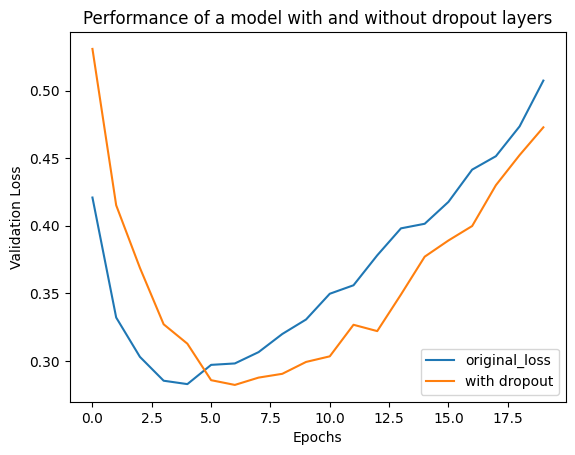

In [29]:
plt.title("Performance of a model with and without dropout layers")
plt.plot(history_original.history["val_loss"], label="original_loss")
plt.plot(history_dropout.history["val_loss"], label="with dropout")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()